In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pwai9ndG93bi1sb2NhbC9kc2FuNTY1MC93MDk='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_87064/1313647100.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap.py": 1694574412.6564615, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap_external.py": 1694574412.6611667, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/zipimport.py": 1694574410.7775924, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/codecs.py": 1694574410.2208612, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/aliases.py": 1694574411.6929739, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/__init__.py": 1694574411.687787, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/utf_8.py": 1694574412.1652963, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/abc.py": 1694574410.153477, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/io.py": 1694574410.3361063, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/stat.py": 1694574410.6048596, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/_collections_abc.py": 1694574410.109986, "/Users/jpj/.pyenv/versions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patchworklib as pw;

import statsmodels.formula.api as smf
from causalml.match import create_table_one
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression

def generate_data(N=300, seed=1):
  np.random.seed(seed)
  
  # Control variables
  male = np.random.binomial(1, 0.45, N)
  age = np.rint(18 + np.random.beta(2, 2, N)*50)
  hours = np.minimum(np.round(np.random.lognormal(5, 1.3, N), 1), 2000)
  
  # Treatment
  pr = np.maximum(0, np.minimum(1, 0.8 + 0.3*male - np.sqrt(age-18)/10))
  dark_mode = np.random.binomial(1, pr, N)==1
  
  # Outcome
  read_time = np.round(np.random.normal(10 - 4*male + 2*np.log(hours) + 2*dark_mode, 4, N), 1)

  # Generate the dataframe
  df = pd.DataFrame({'read_time': read_time, 'dark_mode': dark_mode, 'male': male, 'age': age, 'hours': hours})

  return df

user_df = generate_data(N=300)
ols_model = smf.ols("read_time ~ dark_mode", data=user_df).fit()
ols_summary = ols_model.summary()
results_as_html = ols_summary.tables[1].as_html()
ols_summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
ols_summary_df[['coef','std err']]
#type(ols_summary.tables[1])[['coef','std err']]
# .tables[1]
# ols_df[['coef','std err']]

,coef,std err
Intercept,19.1748,0.402
dark_mode[T.True],-0.4446,0.571


<Figure size 96x96 with 0 Axes>

In [3]:
#| label: page-read-data
user_df.head()

,read_time,dark_mode,male,age,hours
0,14.4,False,0,43.0,65.6
1,15.4,False,1,55.0,125.4
2,20.9,True,0,23.0,642.6
3,20.0,False,0,41.0,129.1
4,21.5,True,0,29.0,190.2


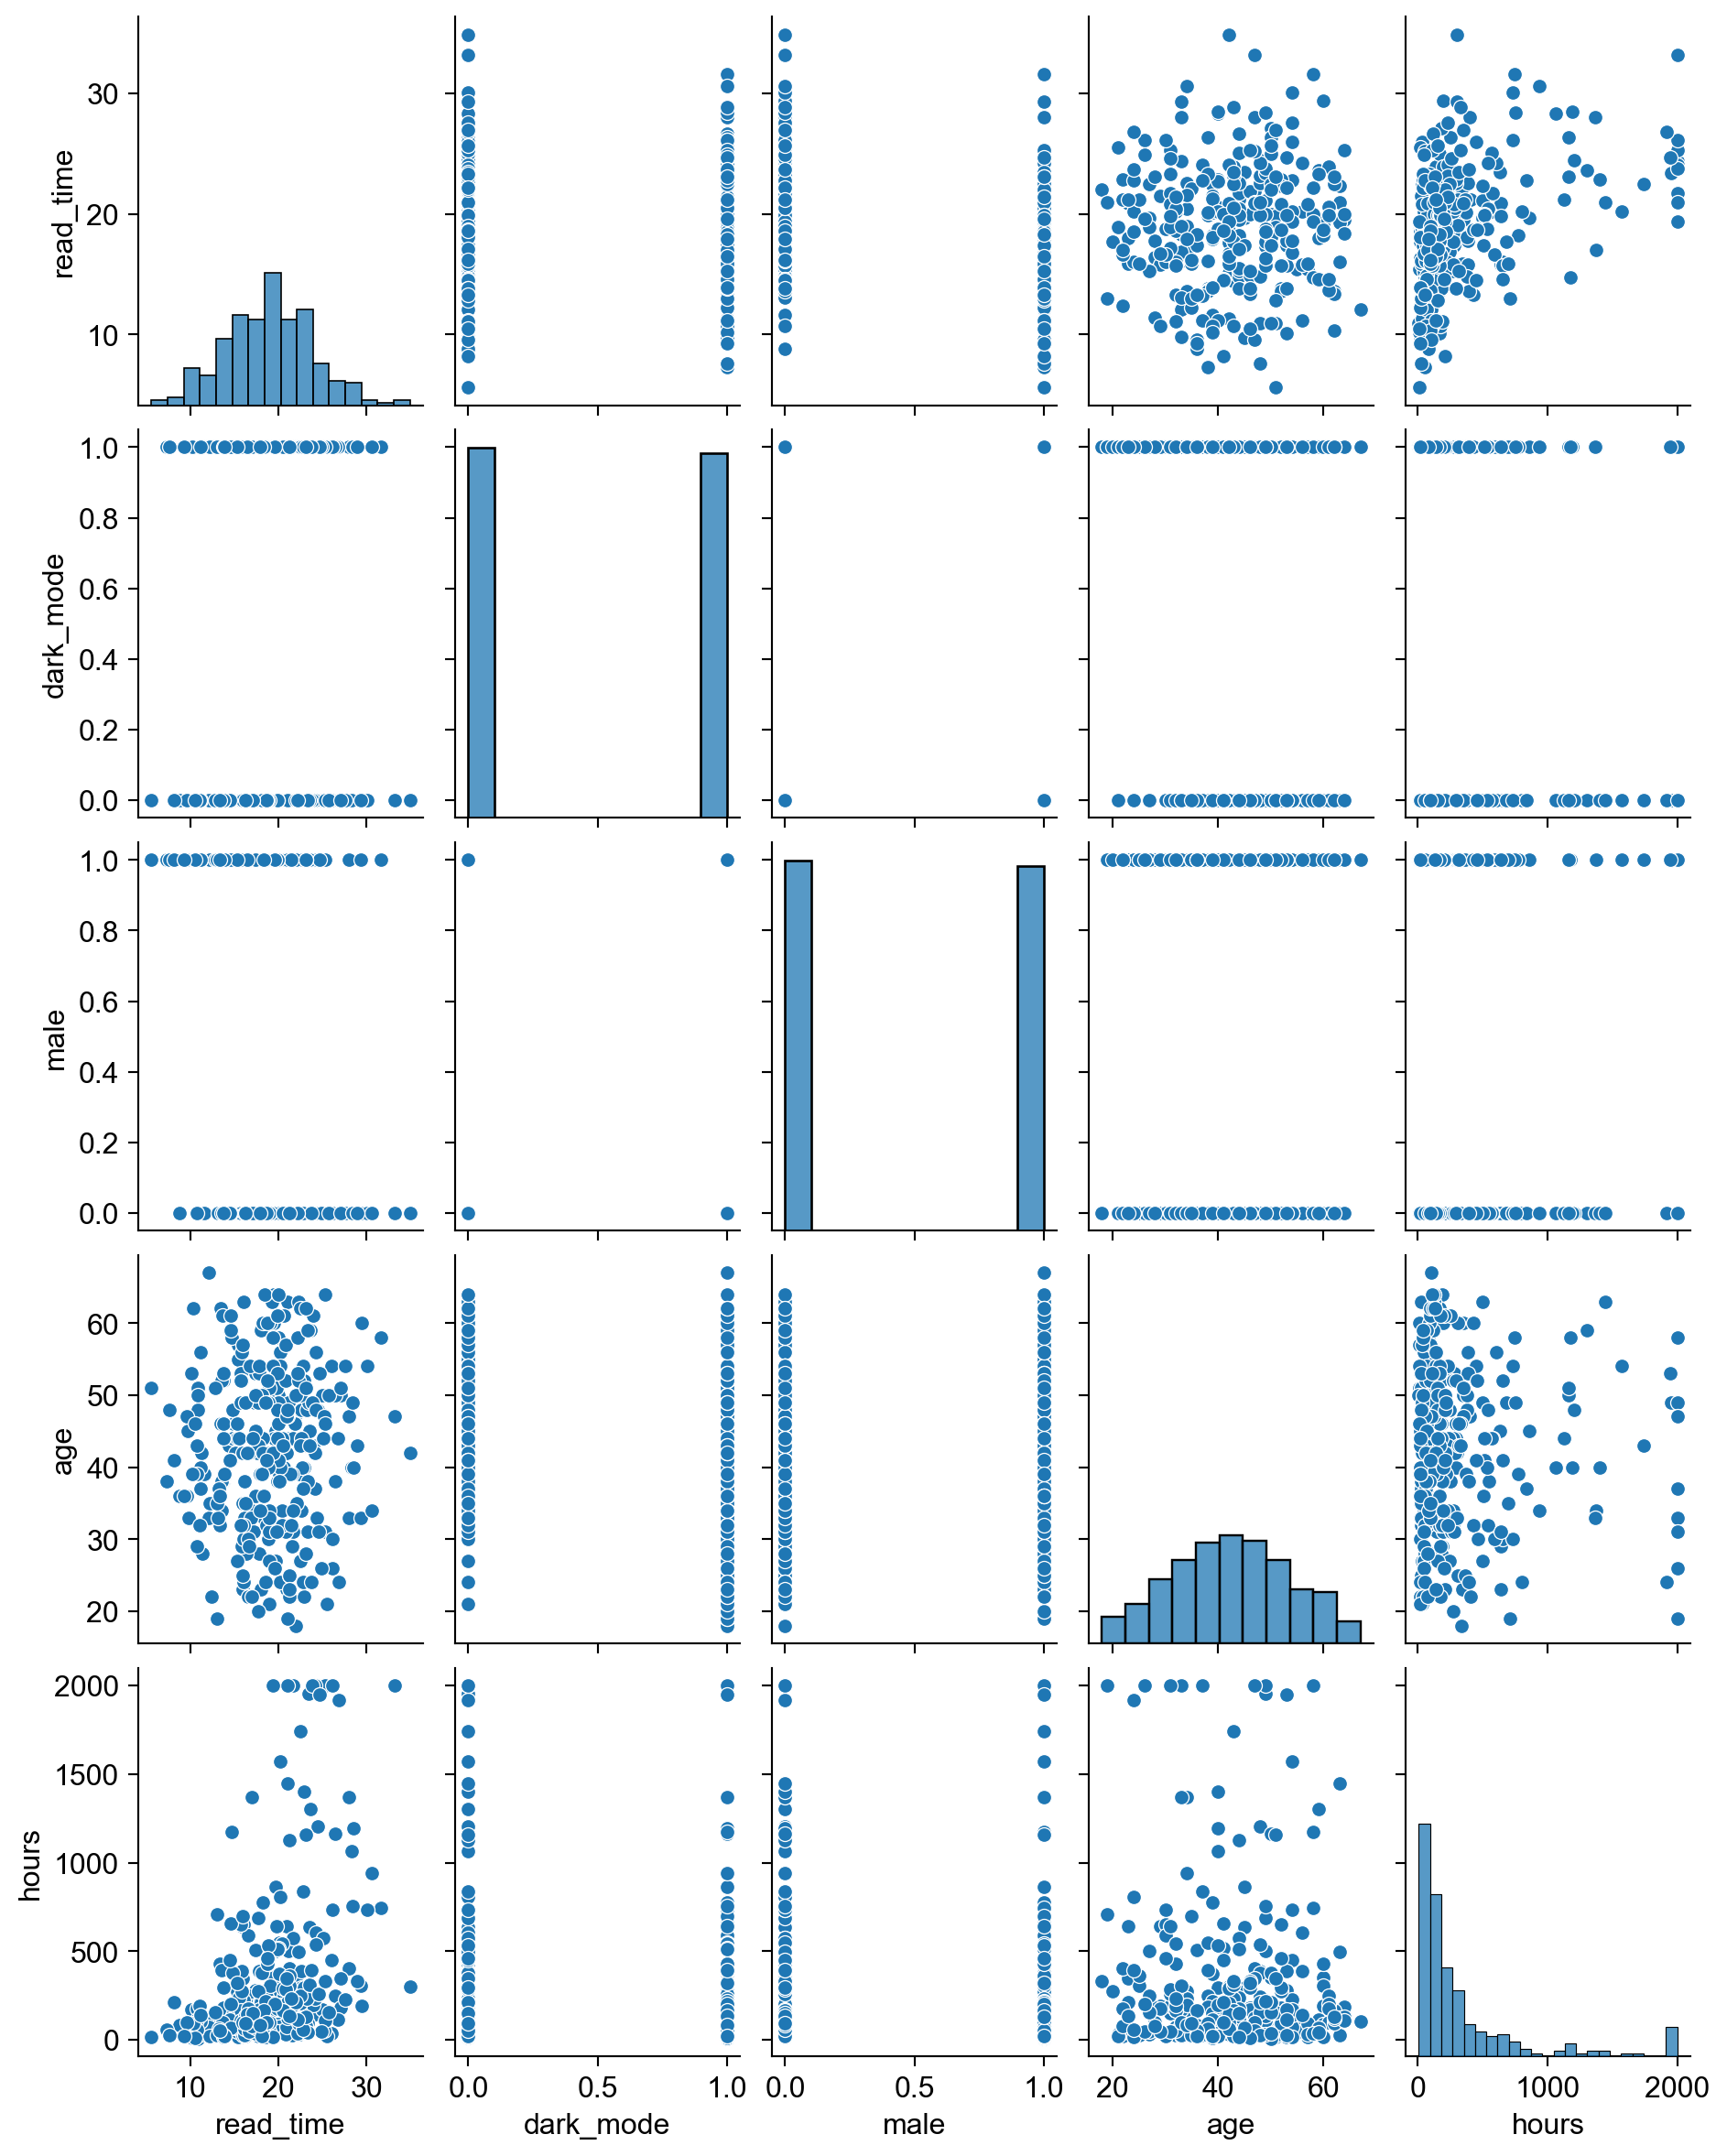

In [4]:
#| fig-align: center
#ax = pw.Brick(figsize=(8,5))
sns.pairplot(
  data=user_df, aspect=0.8
)

In [5]:
from IPython.display import display, HTML
X = ['male', 'age', 'hours']
table1 = create_table_one(user_df, 'dark_mode', X)
user_df.to_csv("assets/user_df.csv")
table1.to_csv("assets/table1.csv")
HTML(table1.to_html())

,Control,Treatment,SMD
Variable,,,
n,151,149,
age,46.01 (9.79),39.09 (11.53),-0.6469
hours,337.78 (464.00),328.57 (442.12),-0.0203
male,0.34 (0.47),0.66 (0.48),0.6732


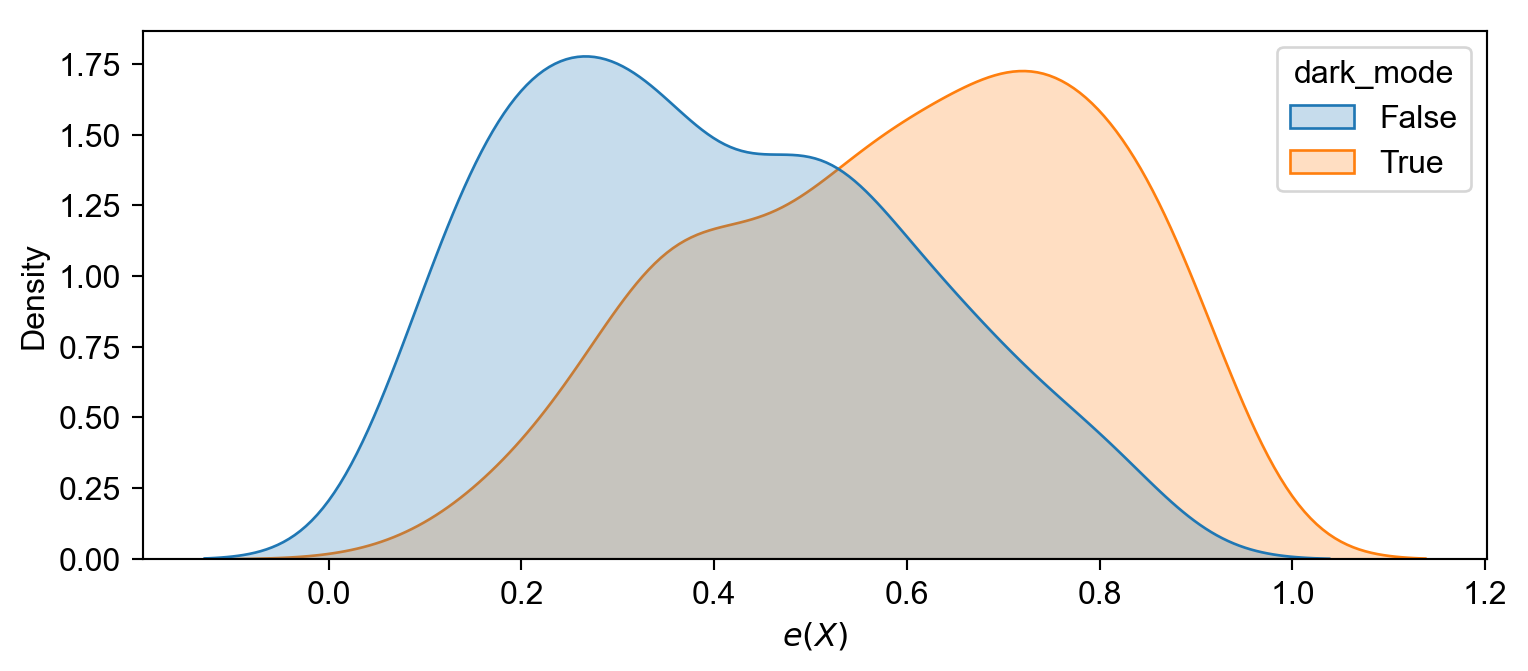

In [6]:
#| fig-align: center
def estimate_e(df, X, D, model_e):
    e = model_e.fit(df[X], df[D]).predict_proba(df[X])[:,1]
    return e
user_df['e'] = estimate_e(user_df, X, "dark_mode", LogisticRegression())
ax = pw.Brick(figsize=(7, 2.75));
sns.kdeplot(
  x='e', hue='dark_mode', data=user_df,
  # bins=30,
  #stat='density',
  common_norm=False,
  fill=True,
  ax=ax
);
ax.set_xlabel("$e(X)$");
ax.savefig()

In [7]:
w = 1 / (user_df['e'] * user_df["dark_mode"] + (1-user_df['e']) * (1-user_df["dark_mode"]))
smf.wls("read_time ~ dark_mode", weights=w, data=user_df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.5871,0.412,45.158,0.000,17.777,19.397
dark_mode[T.True],1.0486,0.581,1.805,0.072,-0.095,2.192


In [8]:
def estimate_mu(df, X, D, y, model_mu):
    mu = model_mu.fit(df[X + [D]], df[y])
    mu0 = mu.predict(df[X + [D]].assign(dark_mode=0))
    mu1 = mu.predict(df[X + [D]].assign(dark_mode=1))
    return mu0, mu1
from sklearn.linear_model import LinearRegression

mu0, mu1 = estimate_mu(user_df, X, "dark_mode", "read_time", LinearRegression())
print(np.mean(mu0), np.mean(mu1))
print(np.mean(mu1-mu0))

18.265714409803312 19.651524322951012
1.3858099131476969


In [9]:
from econml.dr import LinearDRLearner

model = LinearDRLearner(
  model_propensity=LogisticRegression(),
  model_regression=LinearRegression(),
  random_state=5650
)
model.fit(Y=user_df["read_time"], T=user_df["dark_mode"], X=user_df[X]);
model.ate_inference(X=user_df[X].values, T0=0, T1=1).summary().tables[0]

mean_point,stderr_mean,zstat,pvalue,ci_mean_lower,ci_mean_upper
1.321,0.549,2.409,0.016,0.246,2.396


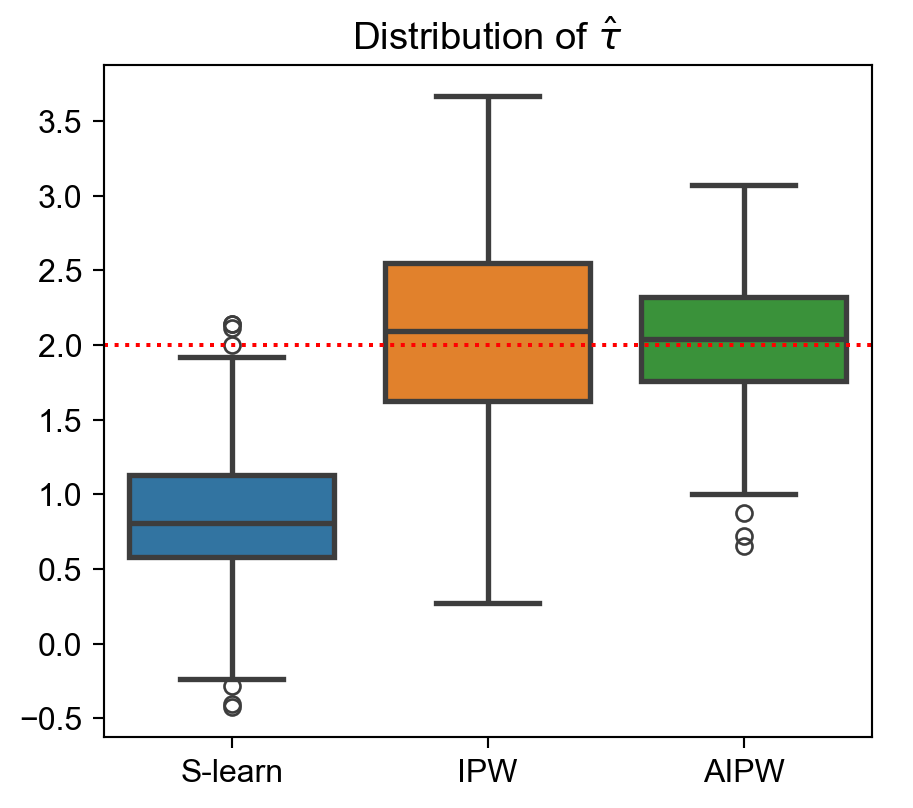

In [10]:
#| fig-align: center
def compare_estimators(X_e, X_mu, D, y, seed):
    df = generate_data(seed=seed)
    e = estimate_e(df, X_e, D, LogisticRegression())
    mu0, mu1 = estimate_mu(df, X_mu, D, y, LinearRegression())
    slearn = mu1 - mu0
    ipw = (df[D] / e - (1-df[D]) / (1-e)) * df[y]
    aipw = slearn + df[D] / e * (df[y] - mu1) - (1-df[D]) / (1-e) * (df[y] - mu0)
    return np.mean((slearn, ipw, aipw), axis=1)

def simulate_estimators(X_e, X_mu, D, y):
    r = Parallel(n_jobs=8)(delayed(compare_estimators)(X_e, X_mu, D, y, i) for i in range(100))
    df_tau = pd.DataFrame(r, columns=['S-learn', 'IPW', 'AIPW'])
    return df_tau
# The actual plots
ax = pw.Brick(figsize=(4, 3.5))
wrong_reg_df = simulate_estimators(
  X_e=['male', 'age'], X_mu=['hours'], D="dark_mode", y="read_time"
)
wrong_reg_plot = sns.boxplot(
  data=pd.melt(wrong_reg_df), x='variable', y='value', hue='variable',
  ax=ax,
  linewidth=2
);
wrong_reg_plot.set(
  title="Distribution of $\hat τ$", xlabel='', ylabel=''
);
ax.axhline(2, c='r', ls=':');
ax.savefig()

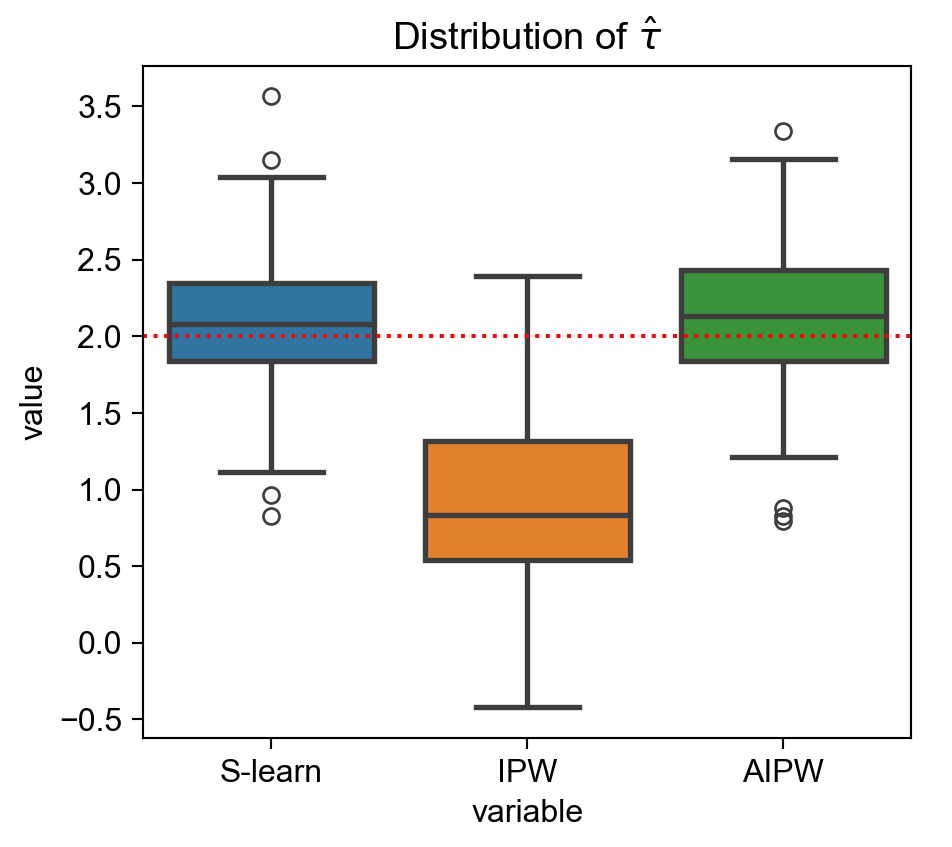

In [11]:
#| fig-align: center
ax = pw.Brick(figsize=(4, 3.5))
wrong_ps_df = simulate_estimators(
  ['age'], ['male', 'hours'], D="dark_mode", y="read_time"
)
wrong_ps_plot = sns.boxplot(
  data=pd.melt(wrong_ps_df), x='variable', y='value', hue='variable',
  ax=ax,
  linewidth=2
);
ax.set_title("Distribution of $\hat τ$");
ax.axhline(2, c='r', ls=':');
ax.savefig()